In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

## Import csv & make copy

In [2]:
houses = pd.read_csv('../Datasets/houses_subset.csv')

In [3]:
houses_copy = houses.copy()

## Examine dataset

In [4]:
houses_copy.head()

,SalePrice,OverallCond,OverallQual,YearBuilt,YearRemodAdd,MoSold,YrSold,LotArea,TotalBath,BedroomAbvGr,GarageCars
0,208500,5,7,2003,2003,2,2008,8450,2.5,3,2
1,181500,8,6,1976,1976,5,2007,9600,2.0,3,2
2,223500,5,7,2001,2002,9,2008,11250,2.5,3,2
3,140000,5,7,1915,1970,2,2006,9550,1.0,3,3
4,250000,5,8,2000,2000,12,2008,14260,2.5,4,3


In [5]:
houses_copy.shape

(1460, 11)

In [6]:
houses_copy.describe()

,SalePrice,OverallCond,OverallQual,YearBuilt,YearRemodAdd,MoSold,YrSold,LotArea,TotalBath,BedroomAbvGr,GarageCars
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,5.575342,6.099315,1971.267808,1984.865753,6.321918,2007.815753,10516.828082,1.756507,2.866438,1.767123
std,79442.502883,1.112799,1.382997,30.202904,20.645407,2.703626,1.328095,9981.264932,0.636015,0.815778,0.747315
min,34900.000000,1.000000,1.000000,1872.000000,1950.000000,1.000000,2006.000000,1300.000000,0.000000,0.000000,0.000000
25%,129975.000000,5.000000,5.000000,1954.000000,1967.000000,5.000000,2007.000000,7553.500000,1.000000,2.000000,1.000000
50%,163000.000000,5.000000,6.000000,1973.000000,1994.000000,6.000000,2008.000000,9478.500000,2.000000,3.000000,2.000000
75%,214000.000000,6.000000,7.000000,2000.000000,2004.000000,8.000000,2009.000000,11601.500000,2.500000,3.000000,2.000000
max,755000.000000,9.000000,10.000000,2010.000000,2010.000000,12.000000,2010.000000,215245.000000,3.500000,8.000000,4.000000


In [7]:
houses_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   int64  
 1   OverallCond   1460 non-null   int64  
 2   OverallQual   1460 non-null   int64  
 3   YearBuilt     1460 non-null   int64  
 4   YearRemodAdd  1460 non-null   int64  
 5   MoSold        1460 non-null   int64  
 6   YrSold        1460 non-null   int64  
 7   LotArea       1460 non-null   int64  
 8   TotalBath     1460 non-null   float64
 9   BedroomAbvGr  1460 non-null   int64  
 10  GarageCars    1460 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 125.6 KB


### Variance

In [8]:
ddof = 1
houses_copy.var(ddof=ddof)
#low variance in YrSold makes sense
#since we only have data from properties sold between 2006 and 2010


SalePrice       6.311111e+09
OverallCond     1.238322e+00
OverallQual     1.912679e+00
YearBuilt       9.122154e+02
YearRemodAdd    4.262328e+02
MoSold          7.309595e+00
YrSold          1.763837e+00
LotArea         9.962565e+07
TotalBath       4.045155e-01
BedroomAbvGr    6.654938e-01
GarageCars      5.584797e-01
dtype: float64

### Covariance

In [9]:
houses_copy.cov()

,SalePrice,OverallCond,OverallQual,YearBuilt,YearRemodAdd,MoSold,YrSold,LotArea,TotalBath,BedroomAbvGr,GarageCars
SalePrice,6.311111e+09,-6882.738552,86904.125837,1.254637e+06,831707.852909,9972.849165,-3051.540991,2.092111e+08,30213.201260,10901.465523,38020.181359
OverallCond,-6.882739e+03,1.238322,-0.141484,-1.263671e+01,1.694152,-0.010563,0.064953,-6.260287e+01,-0.136029,0.011783,-0.154478
OverallQual,8.690413e+04,-0.141484,1.912679,2.390622e+01,15.723417,0.264785,-0.050229,1.460548e+03,0.514604,0.114713,0.620814
YearBuilt,1.254637e+06,-12.636709,23.906215,9.122154e+02,369.675456,1.012426,-0.546237,4.289113e+03,9.634480,-1.740766,12.139859
YearRemodAdd,8.317079e+05,1.694152,15.723417,3.696755e+02,426.232822,1.199517,0.980046,2.841344e+03,5.945357,-0.683467,6.489620
MoSold,9.972849e+03,-0.010563,0.264785,1.012426e+00,1.199517,7.309595,-0.523238,3.251734e+01,0.077068,0.102655,0.081873
YrSold,-3.051541e+03,0.064953,-0.050229,-5.462369e-01,0.980046,-0.523238,1.763837,-1.890502e+02,-0.017820,-0.039019,-0.038824
LotArea,2.092111e+08,-62.602871,1460.548271,4.289113e+03,2841.343594,32.517342,-189.050203,9.962565e+07,728.809036,974.574692,1155.203940
TotalBath,3.021320e+04,-0.136029,0.514604,9.634480e+00,5.945357,0.077068,-0.017820,7.288090e+02,0.404516,0.209746,0.234553
BedroomAbvGr,1.090147e+04,0.011783,0.114713,-1.740766e+00,-0.683467,0.102655,-0.039019,9.745747e+02,0.209746,0.665494,0.052494


Covariance indicates the level to which two variables vary together. This indicates if the correlation is positive or negative, but does not indicate the strength of that relationship. 



### Correlation (Pearson)

The correlation coefficient for a set of variables can range from -1 (perfectly negatively correlated) to 1 (perfectly positively correlated). The closer to each of these values a correlation coefficient is (i.e. the further from zero), the stronger the correlation.

In [10]:
houses_copy.corr()

,SalePrice,OverallCond,OverallQual,YearBuilt,YearRemodAdd,MoSold,YrSold,LotArea,TotalBath,BedroomAbvGr,GarageCars
SalePrice,1.000000,-0.077856,0.790982,0.522897,0.507101,0.046432,-0.028923,0.263843,0.597966,0.168213,0.640409
OverallCond,-0.077856,1.000000,-0.091932,-0.375983,0.073741,-0.003511,0.043950,-0.005636,-0.192197,0.012980,-0.185758
OverallQual,0.790982,-0.091932,1.000000,0.572323,0.550684,0.070815,-0.027347,0.105806,0.585038,0.101676,0.600671
YearBuilt,0.522897,-0.375983,0.572323,1.000000,0.592855,0.012398,-0.013618,0.014228,0.501547,-0.070651,0.537850
YearRemodAdd,0.507101,0.073741,0.550684,0.592855,1.000000,0.021490,0.035743,0.013788,0.452780,-0.040581,0.420622
MoSold,0.046432,-0.003511,0.070815,0.012398,0.021490,1.000000,-0.145721,0.001205,0.044819,0.046544,0.040522
YrSold,-0.028923,0.043950,-0.027347,-0.013618,0.035743,-0.145721,1.000000,-0.014261,-0.021097,-0.036014,-0.039117
LotArea,0.263843,-0.005636,0.105806,0.014228,0.013788,0.001205,-0.014261,1.000000,0.114805,0.119690,0.154871
TotalBath,0.597966,-0.192197,0.585038,0.501547,0.452780,0.044819,-0.021097,0.114805,1.000000,0.404253,0.493479
BedroomAbvGr,0.168213,0.012980,0.101676,-0.070651,-0.040581,0.046544,-0.036014,0.119690,0.404253,1.000000,0.086106


This indicates that the variables with the strongest correlations (all positive and above 0.5) with price are:
- OverallQual (0.79)
- GarageCars (0.64)
- TotalBath (0.6)
- YearBuilt (0.52)
- YearRemodAdd (0.51)

These variables would be the most interesting to further examine. 

The lowest correlations are:
- OverallCond (-0.07)
- MoSold (0.05)
- YrSold (-0.02)
- BedroomAbvGr (0.17)

## OLS Linear Regression 1

In [11]:
x = sm.add_constant(houses_copy.YearRemodAdd)
model = sm.OLS(houses_copy.SalePrice,x)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     504.7
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           3.16e-96
Time:                        09:26:41   Log-Likelihood:                -18327.
No. Observations:                1460   AIC:                         3.666e+04
Df Residuals:                    1458   BIC:                         3.667e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.692e+06   1.72e+05    -21.415   

The R Squared of 0.257 indicates that the year the house was renovated (or built if no renovation has occurred) accounts for 25.7% of variation in price. This is a weak positive correlation.  
  
Given our data, assuming the null hypothesis (of 0), the likelihood of obtaining the regression coefficient that we observed or more extreme is 0.000. Since this is below the Alpha level of 5%, it is statistically significant and we can reject the null hypothesis.

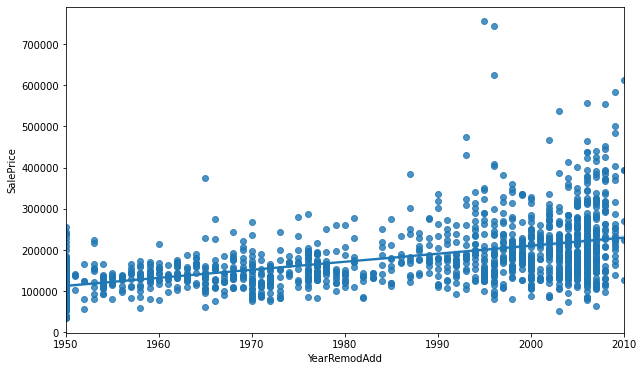

In [12]:
fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(data=houses_copy, 
             x="YearRemodAdd", 
             y="SalePrice", 
             ax=ax);

This plot provides a clear visualisation that the positive correlation is weak, providing a visual confirmation of the above regression results.

## OLS Linear Regression 2

In [13]:
x1 = sm.add_constant(houses_copy.OverallQual)
model1 = sm.OLS(houses_copy.SalePrice,x1)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          2.19e-313
Time:                        09:27:18   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.621e+04   5756.407    -16.713      

The R squared of 0.626 indicates that the overall quality of the house accounts for 62.6% of variation in price. This is a moderate positive correlation.

Given our data, assuming the null hypothesis (of 0), the likelihood of obtaining the regression coefficient that we observed or more extreme is 0.000. Since this is below the Alpha level of 5%, it is statistically significant and we can reject the null hypothesis.


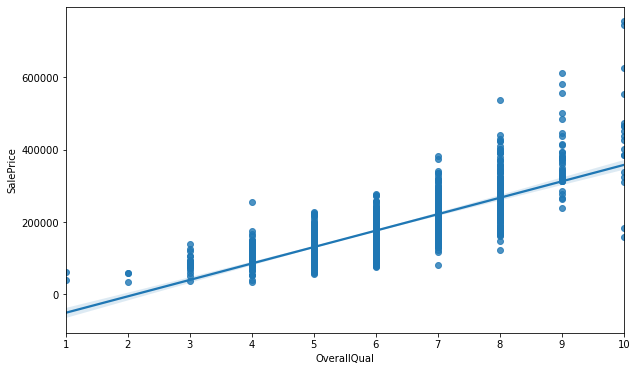

In [14]:
fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(data=houses_copy, 
             x="OverallQual", 
             y="SalePrice", 
             ax=ax);

This plot provides a clear visualisation that the positive correlation is moderate, providing a visual confirmation of the above regression results.


## Multivariate Regression 1

In [16]:
houses_copy = sm.add_constant(houses_copy)
x2 = houses_copy[['const', 'YearRemodAdd', 'YearBuilt']]
model2 = sm.OLS(houses_copy['SalePrice'],x2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     364.2
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          5.27e-129
Time:                        09:28:38   Log-Likelihood:                -18248.
No. Observations:                1460   AIC:                         3.650e+04
Df Residuals:                    1457   BIC:                         3.652e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.917e+06   1.64e+05    -23.840   

The adjusted R squared of 0.332 indicates that the year the house was built and the year of remodelling together accounts for 33.2% of variation in price. This is a moderate positive correlation. 

Given our data, assuming the null hypothesis (of 0), the likelihood of obtaining the regression coefficient that we observed or more extreme is 0.000 for build year and 0.000 for remodel year. Since this is below the Alpha level of 5%, it is statistically significant and we can reject the null hypothesis.

There could be multicollinearity present, since the year of remodel variable uses the build year as its value when no remodel has occurred. Therefore, it may be better not to include both of these variables in 1 multiple regression.

## Multivariate Regression 2

In [17]:
houses_copy = sm.add_constant(houses_copy)
x3 = houses_copy[['const', 'OverallQual', 'GarageCars', 'TotalBath', 'YearRemodAdd']]
model3 = sm.OLS(houses_copy['SalePrice'],x3)
results3 = model3.fit()
print(results3.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     792.2
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:29:03   Log-Likelihood:                -17700.
No. Observations:                1460   AIC:                         3.541e+04
Df Residuals:                    1455   BIC:                         3.544e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.394e+05   1.34e+05     -3.269   

The adjusted R squared of 0.684 indicates that these variables together account for 68.4% of variation in price. This is a moderate (almost strong) positive correlation.

Given our data, assuming the null hypothesis (of 0), the likelihood of obtaining the regression coefficient that we observed or more extreme is 0.000 for the overall quality, 0.000 for number of cars in garage, 0.000 for number of bathrooms and 0.010 for remodel year. Since these are all above the Alpha level of 5%, they are statistically significant and we can reject the null hypothesis.


coef is for each unit increase in X, this is the change in Y.
alpha level is the P>t thing
t is if it's bigger then 1.96 pos or neg, also means stat sig & can reject null hypothesis


## Second subset

I wanted to see if there were other variables that might explain more variance in price, so I created a second subset with additional variables.

### Import CSV & make copy

In [18]:
houses2 = pd.read_csv('../Datasets/houses_subset2.csv')


In [19]:
houses2_copy = houses2.copy()

### Examine data subset

In [20]:
houses2_copy.head()

,SalePrice,OverallQual,GrLivArea,YearRemodAdd,TotalBsmtSF,1stFlrSF,BedroomAbvGr,TotalBath,TotRmsAbvGrd,GarageCars
0,208500,7,1710,2003,856,856,3,2.5,8,2
1,181500,6,1262,1976,1262,1262,3,2.0,6,2
2,223500,7,1786,2002,920,920,3,2.5,6,2
3,140000,7,1717,1970,756,961,3,1.0,7,3
4,250000,8,2198,2000,1145,1145,4,2.5,9,3


In [21]:
houses2_copy.shape

(1460, 10)

In [22]:
houses2_copy.describe()

,SalePrice,OverallQual,GrLivArea,YearRemodAdd,TotalBsmtSF,1stFlrSF,BedroomAbvGr,TotalBath,TotRmsAbvGrd,GarageCars
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1515.463699,1984.865753,1057.429452,1162.626712,2.866438,1.756507,6.517808,1.767123
std,79442.502883,1.382997,525.480383,20.645407,438.705324,386.587738,0.815778,0.636015,1.625393,0.747315
min,34900.000000,1.000000,334.000000,1950.000000,0.000000,334.000000,0.000000,0.000000,2.000000,0.000000
25%,129975.000000,5.000000,1129.500000,1967.000000,795.750000,882.000000,2.000000,1.000000,5.000000,1.000000
50%,163000.000000,6.000000,1464.000000,1994.000000,991.500000,1087.000000,3.000000,2.000000,6.000000,2.000000
75%,214000.000000,7.000000,1776.750000,2004.000000,1298.250000,1391.250000,3.000000,2.500000,7.000000,2.000000
max,755000.000000,10.000000,5642.000000,2010.000000,6110.000000,4692.000000,8.000000,3.500000,14.000000,4.000000


## Check correlations

In [23]:
houses2_copy.corr()

,SalePrice,OverallQual,GrLivArea,YearRemodAdd,TotalBsmtSF,1stFlrSF,BedroomAbvGr,TotalBath,TotRmsAbvGrd,GarageCars
SalePrice,1.000000,0.790982,0.708624,0.507101,0.613581,0.605852,0.168213,0.597966,0.533723,0.640409
OverallQual,0.790982,1.000000,0.593007,0.550684,0.537808,0.476224,0.101676,0.585038,0.427452,0.600671
GrLivArea,0.708624,0.593007,1.000000,0.287389,0.454868,0.566024,0.521270,0.710087,0.825489,0.467247
YearRemodAdd,0.507101,0.550684,0.287389,1.000000,0.291066,0.240379,-0.040581,0.452780,0.191740,0.420622
TotalBsmtSF,0.613581,0.537808,0.454868,0.291066,1.000000,0.819530,0.050450,0.261114,0.285573,0.434585
1stFlrSF,0.605852,0.476224,0.566024,0.240379,0.819530,1.000000,0.127401,0.282300,0.409516,0.439317
BedroomAbvGr,0.168213,0.101676,0.521270,-0.040581,0.050450,0.127401,1.000000,0.404253,0.676620,0.086106
TotalBath,0.597966,0.585038,0.710087,0.452780,0.261114,0.282300,0.404253,1.000000,0.616319,0.493479
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.191740,0.285573,0.409516,0.676620,0.616319,1.000000,0.362289
GarageCars,0.640409,0.600671,0.467247,0.420622,0.434585,0.439317,0.086106,0.493479,0.362289,1.000000


This indicates that the variables with the strongest correlations (all positive and above 0.5) with price are:
- OverallQual (0.79)
- GrLivArea (0.71)
- GarageCars (0.64)
- TotalBsmtSF (0.61)
- 1stFlrSF (0.61)
- TotalBath (0.60)
- TotRmsAbvGrd (0.53)
- YearRemodAdd (0.51)

These variables would be the most interesting to further examine.

The lowest correlation is BedroomAbvGr (0.17)

## Linear Regression

In [24]:
x4 = sm.add_constant(houses2_copy.GrLivArea)
model4 = sm.OLS(houses2_copy.SalePrice,x4)
results4 = model4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          4.52e-223
Time:                        09:30:24   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

The R Squared of 0.502 indicates that the year the above ground area of the property accounts for 50.2% of variation in price. This is a moderate positive correlation.  
  
Given our data, assuming the null hypothesis (of 0), the likelihood of obtaining the regression coefficient that we observed or more extreme is 0.000. Since this is below the Alpha level of 5%, it is statistically significant and we can reject the null hypothesis.

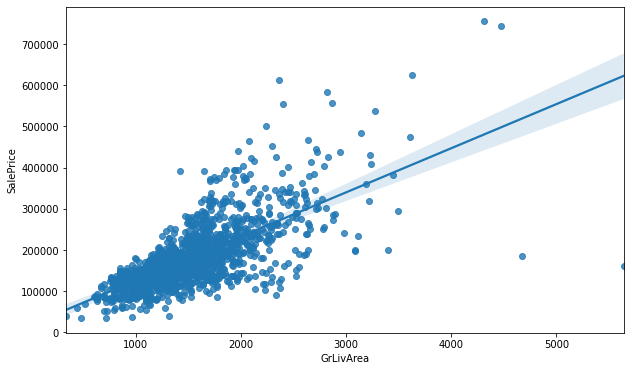

In [25]:
fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(data=houses2_copy, 
             x="GrLivArea", 
             y="SalePrice", 
             ax=ax);

This visualisation shows the moderate positive correlation indicated in the regression results. It also shows that the majority of properties are clustered around the bottom left of the graph, with a few outliers indicating particularly large properties with coinciding high prices.

## Multivariate regression

In [26]:
houses2_copy = sm.add_constant(houses2_copy)
x5 = houses2_copy[['const', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'TotRmsAbvGrd', 'TotalBath']]
model5 = sm.OLS(houses2_copy['SalePrice'],x5)
results5 = model5.fit()
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     664.9
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:31:03   Log-Likelihood:                -17496.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1452   BIC:                         3.505e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.004e+05   6004.010    -16.728   

The adjusted R squared of 0.761 indicates that these variables together account for 76.1% of variation in price. This is a strong positive correlation.

Given our data, assuming the null hypothesis (of 0), the likelihood of obtaining the regression coefficient that we observed or more extreme is 0.000 for the overall quality, 0.000 for the living area size, 0.000 for the basement size, 0.020 for the first floor size (ground floor in Europe) and 0.000 for number of cars in garage. Since these are all above the Alpha level of 5%, they are statistically significant and we can reject the null hypothesis.

However, the likelihood of obtaining the regression coefficient that we observed or more extreme is 0.426 for the total number of rooms above grade and 0.069 for the total number of bathrooms. These are above the Alpha level of 5%, so they are statistically insignificant and we cannot reject the null hypothesis for these variables. I decided therefore to remove these variable from my regression (below) and found that that makes up the best multivariate regression of all that I have tried. 

## OLS regression results - 76.1% of variance in price explained

In [27]:
houses2_copy = sm.add_constant(houses2_copy)
x6 = houses2_copy[['const', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageCars']]
model6 = sm.OLS(houses2_copy['SalePrice'],x6)
results6 = model6.fit()
print(results6.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     928.8
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:31:32   Log-Likelihood:                -17497.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1454   BIC:                         3.504e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.03e+05   4901.609    -21.006      

From this multivariate regression, it is evident that overall quality, greater living area, total basement size, size of first floor and number of cars that can fit in the garage account for 76.1% of variance in price. Therefore, I can conclude that the overall quality and the size of the dwelling have a significant impact on price. 